## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [0]:
# Reading the dataset
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
stu=pd.read_csv("G:\Residency 3 - External Lab Assignment/students-data.csv",delimiter=';')
stu.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [5]:
# Dropping missing values
stu.index.name='number'
print(stu.index.name)
print (stu.head())
print(stu.tail())

number
       school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
number                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   
4          GP   F   16       U     GT3       T     3     3    other     other   

        ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
number  ...                                                                 
0       ...      4        3      4     1     1      3        6   5   6   6  
1       ...      5        3      3     1     1      3        4   5   5   6  
2       ...      4        3      2     2     3      3       10   7   8  10  
3       ...      3        2      2     1

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [6]:
stu.dtypes
stu.select_dtypes(exclude=['int64','float64']).head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_col=[['school','sex','address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup','paid','activities','nursery','higher','Dalc','Walc','health','absences','G1','G2','G3']]
stu[cat_col]=stu[cat_col].apply(lambda col : le.fit_transform(col))
print (stu[cat_col].head())

KeyError: "None of [Index([('school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3')], dtype='object')] are in the [columns]"

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [14]:
# Converting the continuous values of grades into classes
stu['G1']=np.where(stu['G1']>=10,1,0)
stu['G2']=np.where(stu['G2']>=10,1,0)
stu['G3']=np.where(stu['G3']>=10,1,0)
stu.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [44]:
# Seperating features an target into seperate dataframes and naming them X and y
X=stu.drop('G3',axis=1)
y=['G3']
print('X')
print(X.head(2))
print('y')
print(y.head(2))

X
       school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
number                                                                         
0          GP   F   18       U     GT3       A     4     4  at_home  teacher   
1          GP   F   17       U     GT3       T     1     1  at_home    other   

        ... romantic famrel  freetime  goout  Dalc Walc health absences G1 G2  
number  ...                                                                    
0       ...       no      4         3      4     1    1      3        6  0  0  
1       ...       no      5         3      3     1    1      3        4  0  0  

[2 rows x 32 columns]
y


AttributeError: 'list' object has no attribute 'head'

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

Text(0, 0.5, 'G3')

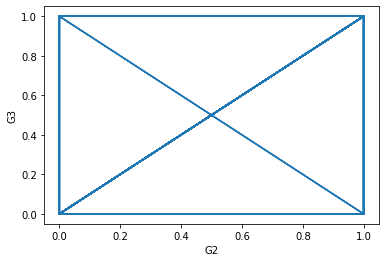

In [20]:
# Plotting G2 and G3 to understand the relation between them
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(stu['G2'],stu['G3'])
plt.xlabel('G2')
plt.ylabel('G3')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

Number of Students in school in GP "0" and MS "1"
GP    349
MS     46
Name: school, dtype: int64


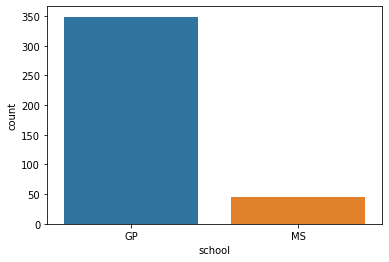

In [22]:
# Plotting no:of students in each school and no:of students with different ages in separate plots
print('Number of Students in school in GP "0" and MS "1"')
print (stu['school'].value_counts())
sns.countplot(data=stu,x='school')

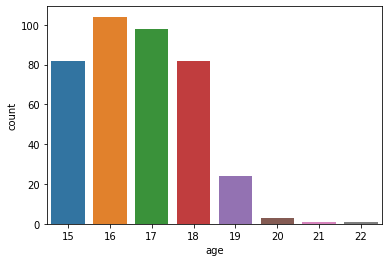

In [23]:
# Number of students with different ages
sns.countplot(data=stu,x='age')

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [48]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify = y_all, test_size=95, random_state=42)
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

SyntaxError: invalid syntax (<ipython-input-48-2958cf1412cc>, line 3)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [46]:
# Model implementation and Testing the accuracy
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled,y_test)
print(model_score)

NameError: name 'X_train' is not defined

# Naive bayes with Iris data

### Import Iris.csv

In [0]:
#Importing Iris data

In [55]:
import pandas as pd
import numpy as np
iris=pd.read_csv("G:\Residency 3 - External Lab Assignment/Iris.csv")
iris.head(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [65]:
# Slicing datafor independent variables and dependent variables
iris = pd.read_csv("G:\Residency 3 - External Lab Assignment/Iris.csv")
iris.iloc[::4]

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa


### Find the distribution of target variable (Class)

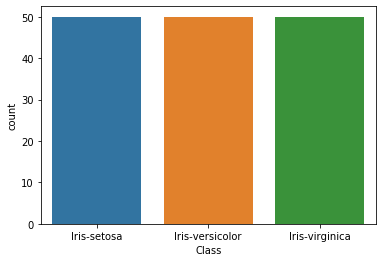

In [62]:
import seaborn as sns
sns.countplot('Class',data=iris)
plt.show()

### Plot the distribution of target variable using histogram

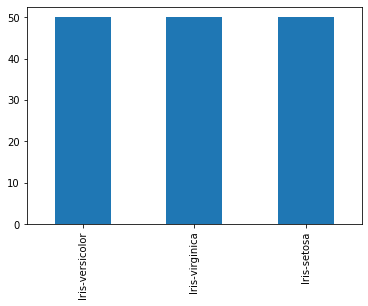

In [64]:
# Histogram plot to understand target variable distribution 
pd.value_counts(iris["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

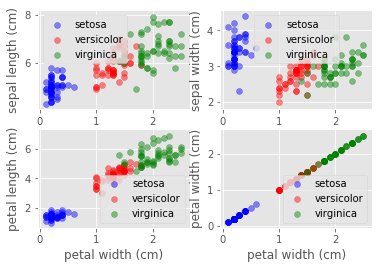

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris() # load the iris dataset
# print("Keys:", iris.keys()) # print keys of dataset

# # shape of data and target
# print("Data shape", iris.data.shape) # (150, 4)
# print("Target shape", iris.target.shape) # (150,)

# print("data:", iris.data[:4]) # first 4 elements

# # unique targets
# print("Unique targets:", np.unique(iris.target)) # [0, 1, 2]
# # counts of each target
# print("Bin counts for targets:", np.bincount(iris.target))

# print("Feature names:", iris.feature_names)
# print("Target names:", iris.target_names)

colors = ['blue', 'red', 'green']
# # plot histogram
# for feature in range(iris.data.shape[1]): # (shape = 150, 4)
    # plt.subplot(2, 2, feature+1) # subplot starts from 1 (not 0)
    # for label, color in zip(range(len(iris.target_names)), colors):
        # # find the label and plot the corresponding data
        # plt.hist(iris.data[iris.target==label, feature],
                 # label=iris.target_names[label],
                 # color=color)
    # plt.xlabel(iris.feature_names[feature])
    # plt.legend()

# plot scatter plot : petal-width vs all features
feature_x= 3 # petal width
for feature_y in range(iris.data.shape[1]):
    plt.subplot(2, 2, feature_y+1) # subplot starts from 1 (not 0)
    for label, color in zip(range(len(iris.target_names)), colors):
        # find the label and plot the corresponding data
        plt.scatter(iris.data[iris.target==label, feature_x],
                    iris.data[iris.target==label, feature_y],
                    label=iris.target_names[label],
                    alpha = 0.45, # transparency
                    color=color)
    plt.xlabel(iris.feature_names[feature_x])
    plt.ylabel(iris.feature_names[feature_y])
    plt.legend()
plt.show()

### Summary Statistics and explain insights for at least 2 variables

In [84]:
import pandas as pd
iris = pd.read_csv("G:\Residency 3 - External Lab Assignment/Iris.csv")
iris.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Correlation among all variables and give your insights

AttributeError: module 'seaborn' has no attribute 'plt'

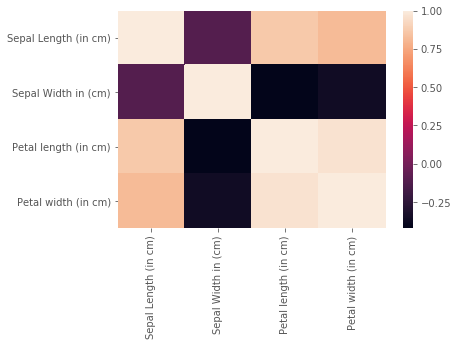

In [88]:
import seaborn as sns
corr = iris.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
sns.plt.show()

### Split data in Training and Validation in 80:20

In [89]:
X = iris.iloc[:, 0:4]  
Y = iris['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(" X_train",X_train)
print("x_test",X_test)
print("y_train",y_train)
print("y_test",y_test)

 X_train      Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
137                   6.4                  3.1                   5.5   
84                    5.4                  3.0                   4.5   
27                    5.2                  3.5                   1.5   
127                   6.1                  3.0                   4.9   
132                   6.4                  2.8                   5.6   
59                    5.2                  2.7                   3.9   
18                    5.7                  3.8                   1.7   
83                    6.0                  2.7                   5.1   
61                    5.9                  3.0                   4.2   
92                    5.8                  2.6                   4.0   
112                   6.8                  3.0                   5.5   
2                     4.7                  3.2                   1.3   
141                   6.9                  3.1         

### Do Feature Scaling

### Train and Fit NaiveBayes Model

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
iris=pd.read_csv("G:\Residency 3 - External Lab Assignment/Iris.csv")
iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [98]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [97]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


### Print Accuracy and Confusion Matrix and Conclude your findings

In [99]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [101]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  29
False predictions 1


Accuracy of the Naive Bayes Clasification is:  0.9666666666666667
